<a href="https://colab.research.google.com/github/yboulaamane/QSARBioPred/blob/main/QSARBioPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QSARBioPred: ML and AI based QSAR modeling for bioactivity prediction of drugs

## 1. Required Libraries

**RDkit:** Provides extensive cheminformatics functionality for working with chemical structures, including fingerprint calculation.    
**Pandas:** Offers robust tools for data manipulation, analysis, and the creation of tabular data structures (DataFrames).  
**ChEMBL web resource client:** Facilitates interaction with the ChEMBL database, allowing you to access and retrieve chemical data programmatically.  
**Scikit-learn:** A versatile machine learning library with a wide range of algorithms for classification, regression, clustering, and more.  
**XGBoost:** Provides a powerful implementation of gradient boosting decision trees, often used for achieving state-of-the-art results on structured data.  
**TensorFlow:** A platform for large-scale numerical computation and machine learning, particularly well-suited for deep learning.  

In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 39.0 MB/s eta 0:00:00


In [2]:
!pip install chembl-webresource-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.2.0
    Uninstalling attrs-23.2.0:
      Successfully uninstalled attrs-23.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.33.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


## 2. ChEMBL Bioactivity Data Retrieval and Pre-processing

This section covers the steps required to connect to the ChEMBL database, query relevant bioactivity data of Acinetobacter baumannii, and perform initial pre-processing to prepare the data for further analysis.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for A. baumannii
target = new_client.target
target_query = target.search('Acinetobacter baumannii')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Acinetobacter baumannii,Acinetobacter baumannii,32.0,False,CHEMBL614425,[],ORGANISM,470
1,[],Acinetobacter,Acinetobacter,16.0,True,CHEMBL614424,[],ORGANISM,469
2,[],Acinetobacter calcoaceticus,Acinetobacter calcoaceticus,14.0,False,CHEMBL614426,[],ORGANISM,471
3,[],Acinetobacter sp.,Acinetobacter sp.,14.0,False,CHEMBL614427,[],ORGANISM,472
4,[],Acinetobacter lwoffii,Acinetobacter lwoffii,14.0,False,CHEMBL613778,[],ORGANISM,28090
5,[],Acinetobacter haemolyticus,Acinetobacter haemolyticus,14.0,False,CHEMBL613782,[],ORGANISM,29430
6,[],Acinetobacter radioresistens,Acinetobacter radioresistens,14.0,False,CHEMBL2366968,[],ORGANISM,40216
7,[],Acinetobacter pittii,Acinetobacter pittii,14.0,False,CHEMBL3140321,[],ORGANISM,48296
8,[],Acinetobacter baylyi,Acinetobacter baylyi,14.0,False,CHEMBL4630663,[],ORGANISM,202950
9,[],Acinetobacter calcoaceticus subsp. anitratus,Acinetobacter calcoaceticus subsp. anitratus,11.0,False,CHEMBL612453,[],ORGANISM,107673


In [ ]:
# Target selection
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL614425'

In [ ]:
# Here we specifiy antimicrobial activities with MIC and ug.mL-1
activities = new_client.activity
res = activities.filter(target_chembl_id=selected_target) \
                .filter(standard_type="MIC") \
                .filter(standard_units="ug.mL-1")

In [ ]:
# Save the bioactivity data in Pandas dataframe for processing
df = pd.DataFrame(res, columns=['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'standard_units'])

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units
0,CHEMBL324974,C[C@H](N)C(=O)N(C)[C@@H](C)[C@H](NC(=O)[C@H](C...,MIC,64.0,ug.mL-1
1,CHEMBL1201259,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.0,ug.mL-1
2,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,MIC,4.0,ug.mL-1
3,CHEMBL272080,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.0,ug.mL-1
4,CHEMBL142949,CCNC1CC(N)C(OC2OC(CNC(=O)C(C)N)=CCC2N)C(O)C1OC...,MIC,128.0,ug.mL-1
...,...,...,...,...,...
8398,CHEMBL262777,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,MIC,50.0,ug.mL-1
8399,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,MIC,0.78,ug.mL-1
8400,CHEMBL5220066,CC(C)=CCn1c2ccccc2c2c(OCC(O)CN(Cc3ccccn3)Cc3cc...,MIC,0.78,ug.mL-1
8401,CHEMBL5220066,CC(C)=CCn1c2ccccc2c2c(OCC(O)CN(Cc3ccccn3)Cc3cc...,MIC,3.125,ug.mL-1


In [ ]:
# Save raw dataset as CSV
df.to_csv('data/a_baumannii_bioactivity_data_raw.csv', index=False)

## 3. Data curation and labelling of active and inactive compounds
This section focuses on removing duplicate compounds and defining criteria to classify compounds as "active" or "inactive" based on their bioactivity data (e.g. MIC). We'll establish thresholds, and ensure clear labeling for subsequent machine learning model development.

### 3.1 Data curation

In [24]:
df = pd.read_csv("data/a_baumannii_bioactivity_data_raw.csv")

In [25]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units
0,CHEMBL324974,C[C@H](N)C(=O)N(C)[C@@H](C)[C@H](NC(=O)[C@H](C...,MIC,64.000,ug.mL-1
1,CHEMBL1201259,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.000,ug.mL-1
2,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,MIC,4.000,ug.mL-1
3,CHEMBL272080,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.000,ug.mL-1
4,CHEMBL142949,CCNC1CC(N)C(OC2OC(CNC(=O)C(C)N)=CCC2N)C(O)C1OC...,MIC,128.000,ug.mL-1
...,...,...,...,...,...
8398,CHEMBL262777,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,MIC,50.000,ug.mL-1
8399,CHEMBL8,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,MIC,0.780,ug.mL-1
8400,CHEMBL5220066,CC(C)=CCn1c2ccccc2c2c(OCC(O)CN(Cc3ccccn3)Cc3cc...,MIC,0.780,ug.mL-1
8401,CHEMBL5220066,CC(C)=CCn1c2ccccc2c2c(OCC(O)CN(Cc3ccccn3)Cc3cc...,MIC,3.125,ug.mL-1


In [26]:
# Convert 'standard_value' column to numeric format, replacing non-numeric values with NaN
df2['standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')

In [27]:
# Calculate the mean of 'standard_value' grouped by 'molecule_chembl_id'
df2['mean_standard_value'] = df2.groupby('molecule_chembl_id')['standard_value'].transform('mean')

In [28]:
# Drop duplicate compounds and keep the first occurrence
df2.drop_duplicates(subset='molecule_chembl_id', keep='first', inplace=True)

In [29]:
df2

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,mean_standard_value
0,CHEMBL324974,C[C@H](N)C(=O)N(C)[C@@H](C)[C@H](NC(=O)[C@H](C...,MIC,64.00,ug.mL-1,64.0000
1,CHEMBL1201259,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.00,ug.mL-1,32.0000
2,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,MIC,4.00,ug.mL-1,3.7500
3,CHEMBL272080,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,MIC,32.00,ug.mL-1,32.0000
4,CHEMBL142949,CCNC1CC(N)C(OC2OC(CNC(=O)C(C)N)=CCC2N)C(O)C1OC...,MIC,128.00,ug.mL-1,128.0000
...,...,...,...,...,...,...
8345,CHEMBL5219946,CCCCCCCCCn1c2ccccc2c2c(OCC(O)CN(Cc3ccccn3)Cc3c...,MIC,50.00,ug.mL-1,40.6250
8346,CHEMBL5220398,OC(COc1cccc2c1c1ccccc1n2CCCC(F)(F)F)CN(Cc1cccc...,MIC,6.25,ug.mL-1,4.6875
8348,CHEMBL4795789,CC(C)=CCn1c2ccccc2c2c(OCC(O)CN(C)C)cccc21,MIC,12.50,ug.mL-1,12.5000
8349,CHEMBL4763534,CCN(CC)CC(O)COc1cccc2c1c1ccccc1n2CC=C(C)C,MIC,50.00,ug.mL-1,37.5000


In [30]:
df2.to_csv('data/a_baumannii_bioactivity_data_processed.csv', index=False)

### 3.2 Data labeling

In [31]:
active=df2.loc[df2['mean_standard_value']<32]
active.shape

(1439, 6)

In [32]:
inactive=df2.loc[df2['mean_standard_value']>64]
inactive.shape

(959, 6)

In [33]:
active["Class"]=1
inactive["Class"]=0

<ipython-input-33-ddb939f86b74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active["Class"]=1
<ipython-input-33-ddb939f86b74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive["Class"]=0


In [34]:
active.head()

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,mean_standard_value,Class
2,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,MIC,4.00,ug.mL-1,3.750000,1
5,CHEMBL1572,CCN[C@@H]1C[C@H](N)[C@@H](O[C@H]2OC(CN)=CC[C@H...,MIC,32.00,ug.mL-1,18.205882,1
8,CHEMBL397431,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,12.50,ug.mL-1,12.500000,1
11,CHEMBL244499,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,3.12,ug.mL-1,3.120000,1
12,CHEMBL244498,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,6.25,ug.mL-1,6.250000,1


In [35]:
df3 = pd.concat([active,inactive],axis=0)
df3

,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,mean_standard_value,Class
2,CHEMBL1384,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,MIC,4.00,ug.mL-1,3.750000,1
5,CHEMBL1572,CCN[C@@H]1C[C@H](N)[C@@H](O[C@H]2OC(CN)=CC[C@H...,MIC,32.00,ug.mL-1,18.205882,1
8,CHEMBL397431,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,12.50,ug.mL-1,12.500000,1
11,CHEMBL244499,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,3.12,ug.mL-1,3.120000,1
12,CHEMBL244498,C[C@@H](O)C1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H]...,MIC,6.25,ug.mL-1,6.250000,1
...,...,...,...,...,...,...,...
8284,CHEMBL5197381,c1ccc2c(c1)[nH]c1cccc(OCc3nnn[nH]3)c12,MIC,128.00,ug.mL-1,128.000000,0
8286,CHEMBL5192175,C=CCn1c2ccccc2c2c(OCc3nnn[nH]3)cccc21,MIC,128.00,ug.mL-1,128.000000,0
8288,CHEMBL5203015,CCn1c2ccccc2c2nnc(SCc3nnc(S)o3)nc21,MIC,256.00,ug.mL-1,256.000000,0
8289,CHEMBL5185068,CCSc1nnc2c3ccccc3n(Cc3nnc(S)o3)c2n1,MIC,256.00,ug.mL-1,256.000000,0


In [36]:
df3.to_csv("data/a_baumannii_bioactivity_data_labelled.csv", index=None)

## 4. Molecular descriptors calculation
Here we standardize the SMILES molecules and employ molecular fingerprints to represent chemical structures in a way that machine learning algorithms can understand. We'll focus on Morgan fingerprints with depth of 4 (also known as Extended Connectivity Fingerprints 4).


In [39]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MolStandardize

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("data/a_baumannii_bioactivity_data_labelled.csv")

# Create a MolStandardize object for standardization
normalizer = MolStandardize.normalize.Normalizer()

# Function to standardize molecular structures
def standardize_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = normalizer.normalize(mol)
    return Chem.MolToSmiles(mol)

# Apply standardization to the 'SMILES' column
data['canonical_smiles'] = data['canonical_smiles'].apply(standardize_molecule)

# Save the modified DataFrame to a new CSV file
data.to_csv("data/a_baumannii_bioactivity_data_labelled_standardized.csv", index=False)

In [40]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Load your DataFrame with SMILES data
data = pd.read_csv("data/a_baumannii_bioactivity_data_labelled_standardized.csv")

# Add a 'molecule' column based on 'Smiles'
data['molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints with depth of 4
num_bits = 2048  # Number of bits in the fingerprint
fingerprints = []

for mol in data['molecule']:
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=num_bits)
        fingerprint = list(fingerprint.ToBitString())
    else:
        fingerprint = [None] * num_bits
    fingerprints.append(fingerprint)

# Convert the list of fingerprints to a DataFrame
fingerprint_df = pd.DataFrame(fingerprints, columns=[f'Morgan_{i}' for i in range(num_bits)])

# Concatenate the original DataFrame with the fingerprint DataFrame
data = pd.concat([data, fingerprint_df], axis=1)

# Save the DataFrame with Morgan fingerprints to a new CSV file
data.to_csv("data/a_baumannii_with_morgan_fingerprints.csv", index=None)

In [41]:
data.shape

(2398, 2056)

## 5. Feature selection

To improve model performance and prevent overfitting, this project employs feature selection techniques. Specifically, we address the following:

**Highly Correlated Features:** Features that exhibit high correlation with each other provide redundant information.  We'll identify and remove highly correlated features (e.g., using a correlation matrix and a threshold like 0.7).

**Low Variance Features:**  Features with very low variance provide little predictive power. We'll use a variance threshold to filter out features that fall below a specified level of variance.

In [45]:
descriptors = pd.read_csv("data/a_baumannii_with_morgan_fingerprints.csv")

In [46]:
columns_to_drop = ['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_value', 'standard_units', 'mean_standard_value', 'Class', 'molecule']

In [47]:
X = descriptors.drop(columns=columns_to_drop)

In [48]:
X.shape

(2398, 2048)

In [49]:
y = data['Class'] #class being predicted
y

0       1
1       1
2       1
3       1
4       1
       ..
2393    0
2394    0
2395    0
2396    0
2397    0
Name: Class, Length: 2398, dtype: int64

In [50]:
import numpy as np
# Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Set the upper triangle of the correlation matrix to NaN
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than a threshold (e.g., 0.7)
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)]

# Drop highly correlated columns
X_filtered = X.drop(columns=high_corr_cols)

# Optionally, you can also drop the rows containing NaN values, if any
X_filtered = X_filtered.dropna()

In [51]:
X_filtered.shape

(2398, 1632)

In [52]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd

# Assuming X1_filtered is your pandas DataFrame containing the features

selector = VarianceThreshold(threshold=0.01)

# Fit the selector to your training data
selector.fit(X_filtered)

# Get the indices of the features to keep
indices_to_keep = selector.get_support(indices=True)

# Remove low variance features from data and transform back to DataFrame
X_filtered_selected = pd.DataFrame(selector.transform(X_filtered),
                                     columns=X_filtered.columns[indices_to_keep])

In [53]:
X_filtered_selected.shape

(2398, 749)

In [54]:
X_filtered_selected.to_csv('data/a_baumannii_morgan_fp_selected.csv', index=None)

In [55]:
y.to_csv("data/labels.csv")

## 6. Model Construction and Evaluation
This project explores a range of machine learning algorithms for classification. We'll construct and evaluate the following models:

**Random Forest (RF):** An ensemble method constructs and combines multiple decision trees. Often robust to overfitting and well-suited for nonlinear relationships.  
**Support Vector Machine (SVM):** Finds the optimal hyperplane to separate classes. Excels with linear and nonlinear features (using appropriate kernels).  
**K-Nearest Neighbors (KNN):** Predicts based on the labels of the most similar data points. Simplicity and flexibility are its strengths.  
**XGBoost:** A highly optimized implementation of gradient boosting decision trees. Often delivers top-tier performance on tabular data.  
**Convolutional Neural Network (CNN):** Deep learning architecture specialized for data with spatial structure (e.g., images). We'll adapt CNNs for working with molecular representations if suitable.  

### 6.1. Data partioning

This code implements a two-step data splitting strategy for machine learning. It performs the following:

**Initial Split:** Divides the dataset into a combined training/testing set (80%) and a separate holdout set (20%).
Train/Validation Split: Further splits the training/testing set into a training set (64% of original data) and a validation set (16% of original data).   
**Purpose:**

**Training:** Use the training set to fit your machine learning models.  
**Validation:** Use the validation set to choose the best-performing model and adjust its settings (hyperparameters).  
**Holdout:** The holdout set is reserved for a final, unbiased evaluation of the selected model's performance on unseen data.

In [56]:
X = pd.read_csv('data/a_baumannii_morgan_fp_selected.csv')

In [57]:
y = pd.read_csv("data/labels.csv")
y = y['Class']
y

0       1
1       1
2       1
3       1
4       1
       ..
2393    0
2394    0
2395    0
2396    0
2397    0
Name: Class, Length: 2398, dtype: int64

In [58]:
# Import SKlearn modules
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [59]:
# Split your data into train-test set and holdout set
X_train_test, X_holdout, y_train_test, y_holdout = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Perform train-validation split on the train-test set
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, shuffle=True, stratify=y_train_test, random_state=42)

In [60]:
X_train.shape, X_test.shape, X_holdout.shape

((1534, 749), (384, 749), (480, 749))

### 6.2. Random Forest

In [63]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform Randomized Search for hyperparameter tuning
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [64]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [65]:
# Use the best parameters to train the Random Forest classifier
rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf.fit(X_train_test, y_train_test)

# Evaluate the classifier on the test set
y_pred_test = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Evaluate the classifier on the holdout set
y_pred_holdout = rf.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Holdout Set Accuracy:", accuracy_holdout)

Test Set Accuracy: 0.96875
Holdout Set Accuracy: 0.9125


In [66]:
from sklearn.metrics import mean_squared_error

rf_test = rf.predict(X_test)
auc_rf_test = roc_auc_score(y_test, rf_test)
rmse_rf_test = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
print("AUC:", auc_rf_test)
print("RMSE:", rmse_rf_test)

AUC: 0.965330321852061
RMSE: 0.1767766952966369


In [67]:
rf_holdout = rf.predict(X_holdout)
auc_rf_holdout = roc_auc_score(y_holdout, rf_holdout)
rmse_rf_holdout = np.sqrt(mean_squared_error(y_holdout, rf.predict(X_holdout)))
print("AUC:", auc_rf_holdout)
print("RMSE:", rmse_rf_holdout)

AUC: 0.9097222222222222
RMSE: 0.2958039891549808


In [68]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, rf_test)
print(cf_matrix)

[[146   8]
 [  4 226]]


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_test, rf_test)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, rf_test)

# F1 Score
f1 = f1_score(y_test, rf_test)

# Accuracy
accuracy = accuracy_score(y_test, rf_test)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9826086956521739
Specificity: 0.948051948051948
Positive Predictive Value (Precision): 0.9658119658119658
Negative Predictive Value: 0.9733333333333334
F1 Score: 0.9741379310344828
Accuracy: 0.96875
Matthews Correlation Coefficient (MCC): 0.934893346127923


In [70]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_holdout, rf_holdout)
print(cf_matrix)

[[172  20]
 [ 22 266]]


In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_holdout, rf_holdout)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_holdout, rf_holdout)

# F1 Score
f1 = f1_score(y_holdout, rf_holdout)

# Accuracy
accuracy = accuracy_score(y_holdout, rf_holdout)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9236111111111112
Specificity: 0.8958333333333334
Positive Predictive Value (Precision): 0.9300699300699301
Negative Predictive Value: 0.8865979381443299
F1 Score: 0.926829268292683
Accuracy: 0.9125
Matthews Correlation Coefficient (MCC): 0.8180549783263121


### 6.3. Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [72]:
# Use the best parameters to train the Random Forest classifier
svm = SVC(C=100, gamma=0.01, kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train.ravel())
# Evaluate the classifier on the test set
y_pred_test = svm.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Evaluate the classifier on the holdout set
y_pred_holdout = svm.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Holdout Set Accuracy:", accuracy_holdout)

Test Set Accuracy: 0.8854166666666666
Holdout Set Accuracy: 0.8979166666666667


In [73]:
svm_test = svm.predict(X_test)
auc_svm_test = roc_auc_score(y_test, svm_test)
rmse_svm_test = np.sqrt(mean_squared_error(y_test, svm.predict(X_test)))
print("AUC:", auc_svm_test)
print("RMSE:", rmse_svm_test)

AUC: 0.8764539808018069
RMSE: 0.338501600193165


In [74]:
svm_holdout = svm.predict(X_holdout)
auc_svm_holdout = roc_auc_score(y_holdout, svm_holdout)
rmse_svm_holdout = np.sqrt(mean_squared_error(y_holdout, svm.predict(X_holdout)))
print("AUC:", auc_svm_holdout)
print("RMSE:", rmse_svm_holdout)

AUC: 0.8932291666666665
RMSE: 0.3195048252113469


In [75]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, svm_test)
print(cf_matrix)

[[128  26]
 [ 18 212]]


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_test, svm_test)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, svm_test)

# F1 Score
f1 = f1_score(y_test, svm_test)

# Accuracy
accuracy = accuracy_score(y_test, svm_test)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9217391304347826
Specificity: 0.8311688311688312
Positive Predictive Value (Precision): 0.8907563025210085
Negative Predictive Value: 0.8767123287671232
F1 Score: 0.905982905982906
Accuracy: 0.8854166666666666
Matthews Correlation Coefficient (MCC): 0.7601534337078685


In [77]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_holdout, svm_holdout)
print(cf_matrix)

[[167  25]
 [ 24 264]]


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_holdout, svm_holdout)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_holdout, svm_holdout)

# F1 Score
f1 = f1_score(y_holdout, svm_holdout)

# Accuracy
accuracy = accuracy_score(y_holdout, svm_holdout)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9166666666666666
Specificity: 0.8697916666666666
Positive Predictive Value (Precision): 0.9134948096885813
Negative Predictive Value: 0.8743455497382199
F1 Score: 0.9150779896013864
Accuracy: 0.8979166666666667
Matthews Correlation Coefficient (MCC): 0.7871490430709653


### 6.4. k-Nearest Neighbors

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining parameter range
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Different weighting strategies
    'metric': ['euclidean', 'manhattan']  # Distance metrics to consider
}

# Creating a grid search object
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)

# Fitting the model for grid search
grid.fit(X_train, y_train)

# Printing the best parameters found by grid search
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.918 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.918 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.918 total time=   0.2s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.875 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.906 total time=   0.2s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.926 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.926 total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.926 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.883 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.914 to

In [80]:
# Use the best parameters to train kNN
knn = KNeighborsClassifier(metric='manhattan', weights='distance', n_neighbors=3)
knn.fit(X_train, y_train)
# Evaluate the classifier on the test set
y_pred_test = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Evaluate the classifier on the holdout set
y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Holdout Set Accuracy:", accuracy_holdout)

Test Set Accuracy: 0.8984375
Holdout Set Accuracy: 0.9125


In [81]:
knn_test = knn.predict(X_test)
auc_knn_test = roc_auc_score(y_test, knn_test)
rmse_knn_test = np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))
print("AUC:", auc_knn_test)
print("RMSE:", rmse_knn_test)

AUC: 0.8926877470355731
RMSE: 0.31868871959954903


In [82]:
knn_holdout = knn.predict(X_holdout)
auc_knn_holdout = roc_auc_score(y_holdout, knn_holdout)
rmse_knn_holdout = np.sqrt(mean_squared_error(y_holdout, knn.predict(X_holdout)))
print("AUC:", auc_knn_holdout)
print("RMSE:", rmse_knn_holdout)

AUC: 0.9071180555555556
RMSE: 0.2958039891549808


In [83]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, knn_test)
print(cf_matrix)

[[133  21]
 [ 18 212]]


In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_test, knn_test)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, knn_test)

# F1 Score
f1 = f1_score(y_test, knn_test)

# Accuracy
accuracy = accuracy_score(y_test, knn_test)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9217391304347826
Specificity: 0.8636363636363636
Positive Predictive Value (Precision): 0.9098712446351931
Negative Predictive Value: 0.8807947019867549
F1 Score: 0.9157667386609071
Accuracy: 0.8984375
Matthews Correlation Coefficient (MCC): 0.788016280589077


In [85]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_holdout, knn_holdout)
print(cf_matrix)

[[169  23]
 [ 19 269]]


In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_holdout, knn_holdout)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_holdout, knn_holdout)

# F1 Score
f1 = f1_score(y_holdout, knn_holdout)

# Accuracy
accuracy = accuracy_score(y_holdout, knn_holdout)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9340277777777778
Specificity: 0.8802083333333334
Positive Predictive Value (Precision): 0.9212328767123288
Negative Predictive Value: 0.898936170212766
F1 Score: 0.9275862068965518
Accuracy: 0.9125
Matthews Correlation Coefficient (MCC): 0.8171971948201949


### 6.5. XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Initialize the XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [87]:
from xgboost import XGBClassifier
# Use the best parameters to train XGB
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, colsample_bytree=0.8, gamma=0.01)
xgb.fit(X_train, y_train)
# Evaluate the classifier on the test set
y_pred_test = xgb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Evaluate the classifier on the holdout set
y_pred_holdout = xgb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Holdout Set Accuracy:", accuracy_holdout)

Test Set Accuracy: 0.9088541666666666
Holdout Set Accuracy: 0.9020833333333333


In [88]:
xgb_test = xgb.predict(X_test)
auc_xgb_test = roc_auc_score(y_test, xgb_test)
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
print("AUC:", auc_xgb_test)
print("RMSE:", rmse_xgb_test)

AUC: 0.9024562394127612
RMSE: 0.30190368221228


In [89]:
xgb_holdout = xgb.predict(X_holdout)
auc_xgb_holdout = roc_auc_score(y_holdout, xgb_holdout)
rmse_xgb_holdout = np.sqrt(mean_squared_error(y_holdout, xgb.predict(X_holdout)))
print("AUC:", auc_xgb_holdout)
print("RMSE:", rmse_xgb_holdout)

AUC: 0.8975694444444444
RMSE: 0.3129163892586431


In [90]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, xgb_test)
print(cf_matrix)

[[134  20]
 [ 15 215]]


In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_test, xgb_test)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, xgb_test)

# F1 Score
f1 = f1_score(y_test, xgb_test)

# Accuracy
accuracy = accuracy_score(y_test, xgb_test)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9347826086956522
Specificity: 0.8701298701298701
Positive Predictive Value (Precision): 0.9148936170212766
Negative Predictive Value: 0.8993288590604027
F1 Score: 0.924731182795699
Accuracy: 0.9088541666666666
Matthews Correlation Coefficient (MCC): 0.8095540942632301


In [93]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_holdout, xgb_holdout)
print(cf_matrix)

[[168  24]
 [ 23 265]]


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_holdout, xgb_holdout)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_holdout, xgb_holdout)

# F1 Score
f1 = f1_score(y_holdout, xgb_holdout)

# Accuracy
accuracy = accuracy_score(y_holdout, xgb_holdout)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.9201388888888888
Specificity: 0.875
Positive Predictive Value (Precision): 0.916955017301038
Negative Predictive Value: 0.8795811518324608
F1 Score: 0.9185441941074522
Accuracy: 0.9020833333333333
Matthews Correlation Coefficient (MCC): 0.7958372223543093


### 6.6. Convolutional neural network

In [101]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [103]:
cnn = Sequential()
cnn.add(layers.Embedding(60000, 300, input_length=X_train.shape[1]))
cnn.add(layers.Conv1D(300, 16, activation="relu"))
cnn.add(layers.MaxPooling1D(3))
cnn.add(layers.Conv1D(100, 16, activation="relu"))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(20, activation="relu"))
cnn.add(layers.Dense(1, activation="sigmoid"))
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [104]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 749, 300)          18000000  
                                                                 
 conv1d_6 (Conv1D)           (None, 734, 300)          1440300   
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 244, 300)          0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 229, 100)          480100    
                                                                 
 flatten_3 (Flatten)         (None, 22900)             0         
                                                                 
 dense_6 (Dense)             (None, 20)                458020    
                                                      

In [105]:
#EarlyStopping
#ReduceLROnPlateau
#CSVLogger
from tensorflow import keras
from keras.callbacks import Callback, EarlyStopping, CSVLogger, ReduceLROnPlateau

earlystopping = EarlyStopping(monitor="accuracy", patience=2, mode="auto")
reduceLrloss = ReduceLROnPlateau(monitor="accuracy", factor=0.1, patiences=5, min_delta=1e-4, mode="min")
Logger = CSVLogger("data/cnn_model_log.csv", append=True, separator=",")

In [107]:
history = cnn.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[earlystopping, reduceLrloss, Logger])

Epoch 1/10
96/96 [==============================] - 338s 3s/step - loss: 0.6846 - accuracy: 0.5887 - val_loss: 0.6761 - val_accuracy: 0.5990 - lr: 0.0010
Epoch 2/10
96/96 [==============================] - 274s 3s/step - loss: 0.6787 - accuracy: 0.5978 - val_loss: 0.6737 - val_accuracy: 0.5990 - lr: 0.0010
Epoch 3/10
96/96 [==============================] - 247s 3s/step - loss: 0.6664 - accuracy: 0.6010 - val_loss: 0.6411 - val_accuracy: 0.5990 - lr: 0.0010
Epoch 4/10
96/96 [==============================] - 251s 3s/step - loss: 0.5476 - accuracy: 0.6115 - val_loss: 0.4642 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 5/10
96/96 [==============================] - 253s 3s/step - loss: 0.4347 - accuracy: 0.8292 - val_loss: 0.4278 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 6/10
96/96 [==============================] - 253s 3s/step - loss: 0.3834 - accuracy: 0.8481 - val_loss: 0.3309 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 7/10
96/96 [==============================] - 253s 3s/step - loss: 0.2

In [108]:
# Evaluate the classifier on the test set
y_pred_test = (cnn.predict(X_test) > 0.5).astype("int32")
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Evaluate the classifier on the holdout set
y_pred_holdout = (cnn.predict(X_holdout)> 0.5).astype("int32")
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print("Holdout Set Accuracy:", accuracy_holdout)

12/12 [==============================] - 20s 2s/step
Test Set Accuracy: 0.828125
15/15 [==============================] - 18s 1s/step
Holdout Set Accuracy: 0.8708333333333333


In [109]:
cnn_test = cnn.predict(X_test)
auc_cnn_test = roc_auc_score(y_test, cnn_test)
rmse_cnn_test = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))
print("AUC:", auc_cnn_test)
print("RMSE:", rmse_cnn_test)

12/12 [==============================] - 14s 1s/step
AUC: 0.9470638057594579
RMSE: 0.30190368221228


In [110]:
cnn_holdout = cnn.predict(X_holdout)
auc_cnn_holdout = roc_auc_score(y_holdout, cnn_holdout)
rmse_cnn_holdout = np.sqrt(mean_squared_error(y_holdout, xgb.predict(X_holdout)))
print("AUC:", auc_cnn_holdout)
print("RMSE:", rmse_cnn_holdout)

15/15 [==============================] - 21s 1s/step
AUC: 0.9561270254629629
RMSE: 0.3129163892586431


In [111]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, cnn_test> 0.5)
print(cf_matrix)

[[129  25]
 [ 41 189]]


In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_test, cnn_test> 0.5)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, cnn_test> 0.5)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, cnn_test> 0.5)

# Accuracy
accuracy = accuracy_score(y_test, cnn_test> 0.5)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.8541666666666666
Specificity: 0.8958333333333334
Positive Predictive Value (Precision): 0.883177570093458
Negative Predictive Value: 0.8037383177570093
F1 Score: 0.8513513513513514
Accuracy: 0.828125
Matthews Correlation Coefficient (MCC): 0.6506431184095542


In [125]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_holdout, cnn_holdout> 0.5)
print(cf_matrix)

[[172  20]
 [ 42 246]]


In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef

# Positive Predictive Value (Precision)
precision = precision_score(y_holdout, cnn_holdout> 0.5)

# Confusion Matrix
tn, fp, fn, tp = cf_matrix.ravel()

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_holdout, cnn_holdout> 0.5)

# Negative Predictive Value
npv = tn / (tn + fn)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_holdout, cnn_holdout> 0.5)

# Accuracy
accuracy = accuracy_score(y_holdout, cnn_holdout> 0.5)

# Print the calculated metrics
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (Precision):", precision)
print("Negative Predictive Value:", npv)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Matthews Correlation Coefficient (MCC):", mcc)

Sensitivity (True Positive Rate): 0.8541666666666666
Specificity: 0.8958333333333334
Positive Predictive Value (Precision): 0.924812030075188
Negative Predictive Value: 0.8037383177570093
F1 Score: 0.8880866425992779
Accuracy: 0.8708333333333333
Matthews Correlation Coefficient (MCC): 0.7391973761277484


## 7. Plotting the ROC curve
The Receiver Operating Characteristic (ROC) curve is a vital tool for visualizing the performance of classification models and selecting optimal thresholds. In this section, we'll generate the ROC curve and use it to evaluate our model.



In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

12/12 [==============================] - 23s 2s/step


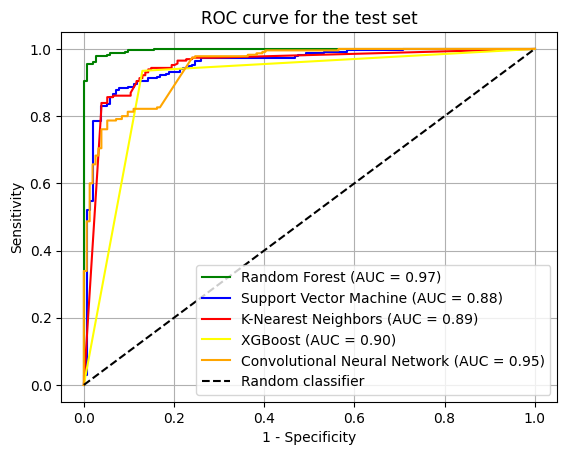

In [186]:
from sklearn.metrics import roc_curve
# Get predicted class probabilities for the test set
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict(X_test).flatten()
y_prob_cnn = cnn.predict(X_test).flatten()

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm, pos_label=1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn, pos_label=1)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb, pos_label=1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_prob_cnn, pos_label=1)

# Compute the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, rf_test)
roc_auc_svm = roc_auc_score(y_test, svm_test)
roc_auc_knn = roc_auc_score(y_test, knn_test)
roc_auc_xgb = roc_auc_score(y_test, xgb_test)
roc_auc_cnn = roc_auc_score(y_test, cnn_test)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, color="green", label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color="blue",label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color="red",label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_xgb, tpr_xgb, color="yellow",label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_cnn, tpr_cnn, color="orange", label='Convolutional Neural Network (AUC = %0.2f)' % roc_auc_cnn)

# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve for the test set')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('plots/plot_roc_test_set.png', dpi=300)
plt.show()

15/15 [==============================] - 19s 1s/step


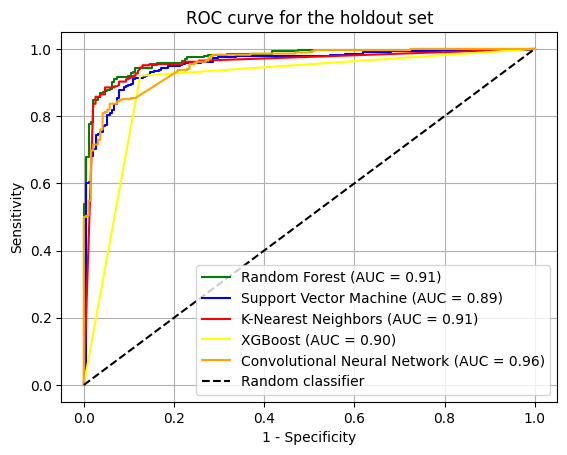

In [187]:
from sklearn.metrics import roc_curve
# Get predicted class probabilities for the holdout set
y_prob_rf = rf.predict_proba(X_holdout)[:, 1]
y_prob_svm = svm.predict_proba(X_holdout)[:, 1]
y_prob_knn = knn.predict_proba(X_holdout)[:, 1]
y_prob_xgb = xgb.predict(X_holdout).flatten()
y_prob_cnn = cnn.predict(X_holdout).flatten()

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_holdout, y_prob_rf, pos_label=1)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_holdout, y_prob_svm, pos_label=1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_holdout, y_prob_knn, pos_label=1)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_holdout, y_prob_xgb, pos_label=1)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_holdout, y_prob_cnn, pos_label=1)

# Compute the ROC AUC score
roc_auc_rf = roc_auc_score(y_holdout, rf_holdout)
roc_auc_svm = roc_auc_score(y_holdout, svm_holdout)
roc_auc_knn = roc_auc_score(y_holdout, knn_holdout)
roc_auc_xgb = roc_auc_score(y_holdout, xgb_holdout)
roc_auc_cnn = roc_auc_score(y_holdout, cnn_holdout)

# Plot the ROC curve
plt.plot(fpr_rf, tpr_rf, color="green", label='Random Forest (AUC = %0.2f)' % auc_rf_holdout)
plt.plot(fpr_svm, tpr_svm, color="blue",label='Support Vector Machine (AUC = %0.2f)' % auc_svm_holdout)
plt.plot(fpr_knn, tpr_knn, color="red",label='K-Nearest Neighbors (AUC = %0.2f)' % auc_knn_holdout)
plt.plot(fpr_xgb, tpr_xgb, color="yellow",label='XGBoost (AUC = %0.2f)' % auc_xgb_holdout)
plt.plot(fpr_cnn, tpr_cnn, color="orange", label='Convolutional Neural Network (AUC = %0.2f)' % roc_auc_cnn)

# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve for the holdout set')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('plots/plot_roc_holdout_set.png', dpi=300)
plt.show()

## 8. Saving the models

This code saves a trained machine learning model for later use. It works in two steps:

**Serialization:** The pickle module converts the model into a format that can be saved to a file (my_model.pkl).

**Compression:** The gzip module compresses the saved model file (my_model.pkl.gz) to reduce its size for easier storage or transfer.

In [133]:
import pickle
import gzip

# Assuming rf, svm, knn, xgb, and cnn are already defined

# Save RandomForestClassifier model
with gzip.open("models/rf_a_baumannii.pkl.gz", "wb") as f:
    pickle.dump(rf, f)

# Save Support Vector Machine model
with gzip.open("models/svm_a_baumannii.pkl.gz", "wb") as f:
    pickle.dump(svm, f)

# Save K-Nearest Neighbors model
with gzip.open("models/knn_a_baumannii.pkl.gz", "wb") as f:
    pickle.dump(knn, f)

# Save XGBoost model
with gzip.open("models/xgb_a_baumannii.pkl.gz", "wb") as f:
    pickle.dump(xgb, f)

# Save Convolutional Neural Network model
with gzip.open("models/cnn_a_baumannii.pkl.gz", "wb") as f:
    pickle.dump(cnn, f)

### 9. Applying the best model to predict the bioactivity of Ambinter natural compounds

This section applies the previously selected best-performing machine learning model to the Ambinter natural compound dataset.  The goal is to predict the bioactivity of these compounds and identify potential candidates for further research.



In [134]:
import pickle
import gzip
# Load Convolutional Neural Network model
with gzip.open("models/cnn_a_baumannii.pkl.gz", "rb") as f:
    best_model = pickle.load(f)

In [135]:
db = pd.read_csv("ambinter/ambinter_ro5.csv", sep=',')
db

,Smiles,ID
0,CC(C)C(C(C(CC1)=C2[C@@](C)(CC3)[C@@H]1C(CO1)=C...,Amb22893395
1,CC(C)(CCC1)[C@H]([C@@H](C2)O)[C@@]1(C)[C@@H](/...,Amb22893415
2,CC(C)=CCc(c(OC(CC1=O)c2ccccc2)c1c(O)c1)c1O,Amb22893107
3,CC(C)(CC1)C[C@H]2C3=CC[C@H]([C@@](C)(CC4)[C@@H...,Amb22893398
4,CC(C)[C@@H](CC[C@@](C)([C@@H](CC1)[C@@H]2[C@]1...,Amb22893380
...,...,...
6146,C[C@@](CN([C@H]1C2)[C@@H]34)(C[C@@H](C5)O)[C@@...,Amb28974300
6147,C[C@H](CC[C@H]1[C@H]2C)[C@@H](CC3)[C@]11OO[C@@...,Amb28974565
6148,C[C@]12O[C@H]1CC(C)(C)/C=C/C/C(/C)=C/CC2,Amb29085726
6149,CC(C)[C@](CC1)(C[C@H]2O[C@]2(C)CC/C=C(/C)\CC2)...,Amb29847129


In [136]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Load your DataFrame with SMILES data
data2 = pd.read_csv("ambinter/ambinter_ro5.csv")

# Add a 'molecule' column based on 'Smiles'
data2['molecule'] = data2['Smiles'].apply(Chem.MolFromSmiles)

# Calculate Morgan fingerprints with depth of 4
num_bits = 2048  # Number of bits in the fingerprint
fingerprints = []

for mol in data2['molecule']:
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=num_bits)
        fingerprint = list(fingerprint.ToBitString())
    else:
        fingerprint = [None] * num_bits
    fingerprints.append(fingerprint)

# Convert the list of fingerprints to a DataFrame
fingerprint_df = pd.DataFrame(fingerprints, columns=[f'Morgan_{i}' for i in range(num_bits)])

# Concatenate the original DataFrame with the fingerprint DataFrame
data2 = pd.concat([data2, fingerprint_df], axis=1)

# Save the DataFrame with Morgan fingerprints to a new CSV file
data2.to_csv("ambinter/ambinter_with_morgan_fingerprints.csv", index=None)

[16:23:13] Explicit valence for atom # 8 N, 4, is greater than permitted
[16:23:13] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:23:13] Explicit valence for atom # 21 C, 5, is greater than permitted
[16:23:13] Explicit valence for atom # 1 N, 4, is greater than permitted
[16:23:13] Explicit valence for atom # 1 N, 4, is greater than permitted
[16:23:13] Explicit valence for atom # 17 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 17 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 2 N, 4, is greater than permitted
[16:23:14] Can't kekulize mol.  Unkekulized atoms: 1 2 7
[16:23:14] Explicit valence for atom # 34 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 1 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 17 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 17 N, 4, is greater than permitted
[16:23:14] Explicit valence for atom # 16 N, 4, is greater t

In [157]:
descriptors = pd.read_csv("data/a_baumannii_morgan_fp_selected.csv")

In [158]:
descriptors.shape

(2398, 749)

In [159]:
data2

,Smiles,ID,molecule,Morgan_0,Morgan_1,Morgan_2,Morgan_3,Morgan_4,Morgan_5,Morgan_6,...,Morgan_2038,Morgan_2039,Morgan_2040,Morgan_2041,Morgan_2042,Morgan_2043,Morgan_2044,Morgan_2045,Morgan_2046,Morgan_2047
0,CC(C)C(C(C(CC1)=C2[C@@](C)(CC3)[C@@H]1C(CO1)=C...,Amb22893395,<rdkit.Chem.rdchem.Mol object at 0x7d0af046ece0>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)(CCC1)[C@H]([C@@H](C2)O)[C@@]1(C)[C@@H](/...,Amb22893415,<rdkit.Chem.rdchem.Mol object at 0x7d0af046ed50>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC(C)=CCc(c(OC(CC1=O)c2ccccc2)c1c(O)c1)c1O,Amb22893107,<rdkit.Chem.rdchem.Mol object at 0x7d0af046edc0>,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,CC(C)(CC1)C[C@H]2C3=CC[C@H]([C@@](C)(CC4)[C@@H...,Amb22893398,<rdkit.Chem.rdchem.Mol object at 0x7d0af046ee30>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(C)[C@@H](CC[C@@](C)([C@@H](CC1)[C@@H]2[C@]1...,Amb22893380,<rdkit.Chem.rdchem.Mol object at 0x7d0af046eea0>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,C[C@@](CN([C@H]1C2)[C@@H]34)(C[C@@H](C5)O)[C@@...,Amb28974300,<rdkit.Chem.rdchem.Mol object at 0x7d0af038ad50>,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6147,C[C@H](CC[C@H]1[C@H]2C)[C@@H](CC3)[C@]11OO[C@@...,Amb28974565,<rdkit.Chem.rdchem.Mol object at 0x7d0af038adc0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6148,C[C@]12O[C@H]1CC(C)(C)/C=C/C/C(/C)=C/CC2,Amb29085726,<rdkit.Chem.rdchem.Mol object at 0x7d0af038ae30>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6149,CC(C)[C@](CC1)(C[C@H]2O[C@]2(C)CC/C=C(/C)\CC2)...,Amb29847129,<rdkit.Chem.rdchem.Mol object at 0x7d0af038aea0>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
common_features = descriptors.columns.intersection(data2.columns)
common_features

Index(['Morgan_1', 'Morgan_2', 'Morgan_4', 'Morgan_5', 'Morgan_6', 'Morgan_8',
       'Morgan_9', 'Morgan_11', 'Morgan_13', 'Morgan_14',
       ...
       'Morgan_2009', 'Morgan_2014', 'Morgan_2018', 'Morgan_2020',
       'Morgan_2026', 'Morgan_2038', 'Morgan_2041', 'Morgan_2042',
       'Morgan_2044', 'Morgan_2045'],
      dtype='object', length=749)

In [162]:
subset = data2[common_features]
subset

,Morgan_1,Morgan_2,Morgan_4,Morgan_5,Morgan_6,Morgan_8,Morgan_9,Morgan_11,Morgan_13,Morgan_14,...,Morgan_2009,Morgan_2014,Morgan_2018,Morgan_2020,Morgan_2026,Morgan_2038,Morgan_2041,Morgan_2042,Morgan_2044,Morgan_2045
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6149,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
subset = subset.dropna()
subset

,Morgan_1,Morgan_2,Morgan_4,Morgan_5,Morgan_6,Morgan_8,Morgan_9,Morgan_11,Morgan_13,Morgan_14,...,Morgan_2009,Morgan_2014,Morgan_2018,Morgan_2020,Morgan_2026,Morgan_2038,Morgan_2041,Morgan_2042,Morgan_2044,Morgan_2045
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6149,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
ids = data2['ID']
ids

0       Amb22893395
1       Amb22893415
2       Amb22893107
3       Amb22893398
4       Amb22893380
           ...     
6146    Amb28974300
6147    Amb28974565
6148    Amb29085726
6149    Amb29847129
6150    Amb31207333
Name: ID, Length: 6151, dtype: object

In [165]:
smiles = data2['Smiles']

In [166]:
smiles = smiles.loc[subset.index]
smiles

0       CC(C)C(C(C(CC1)=C2[C@@](C)(CC3)[C@@H]1C(CO1)=C...
1       CC(C)(CCC1)[C@H]([C@@H](C2)O)[C@@]1(C)[C@@H](/...
2              CC(C)=CCc(c(OC(CC1=O)c2ccccc2)c1c(O)c1)c1O
3       CC(C)(CC1)C[C@H]2C3=CC[C@H]([C@@](C)(CC4)[C@@H...
4       CC(C)[C@@H](CC[C@@](C)([C@@H](CC1)[C@@H]2[C@]1...
                              ...                        
6146    C[C@@](CN([C@H]1C2)[C@@H]34)(C[C@@H](C5)O)[C@@...
6147    C[C@H](CC[C@H]1[C@H]2C)[C@@H](CC3)[C@]11OO[C@@...
6148             C[C@]12O[C@H]1CC(C)(C)/C=C/C/C(/C)=C/CC2
6149    CC(C)[C@](CC1)(C[C@H]2O[C@]2(C)CC/C=C(/C)\CC2)...
6150    CN(CC[C@@]1([C@@H]23)c4cccc(O)c4N2C(C2)=O)CC4=...
Name: Smiles, Length: 6123, dtype: object

In [167]:
ids = ids.loc[subset.index]
ids

0       Amb22893395
1       Amb22893415
2       Amb22893107
3       Amb22893398
4       Amb22893380
           ...     
6146    Amb28974300
6147    Amb28974565
6148    Amb29085726
6149    Amb29847129
6150    Amb31207333
Name: ID, Length: 6123, dtype: object

In [172]:
subset = subset.astype("float64")

In [173]:
db_predict = (best_model.predict(subset) > 0.5).astype("int64")

192/192 [==============================] - 270s 1s/step


In [174]:
df_predictions = pd.DataFrame(db_predict)
df_ids = pd.DataFrame(ids)
df_smiles = pd.DataFrame(smiles)

In [175]:
db_final = pd.concat([df_ids.reset_index(),df_predictions, df_smiles.reset_index()], axis=1)
db_final = db_final.drop("index", axis=1)
db_final.columns = ["ID","Predicted", "Smiles"]

## 10. Save the output predictions

To enable further examination, and integration with other tools, we  save the model's predictions on the Ambinter dataset.


In [176]:
# Filter the DataFrame to keep only rows where Predicted == 1
db_final = db_final[db_final["Predicted"] == 1]

In [177]:
db_final

,ID,Predicted,Smiles
6,Amb22893374,1,C=C(CC[C@H]1C(CC[C@H]2[C@@H]3CS(O)(=O)=O)=C)[C...
14,Amb22893139,1,CC(C)C(C(C([C@@H](C[C@@H]1[C@]2(C)CCCC1(C)C)O)...
25,Amb2609033,1,Oc(cccc1)c1O
29,Amb6600417,1,C[C@@H]([C@@H]([C@H]([C@@H]1O)O)O)O[C@@H]1Oc(c...
35,Amb4037060,1,OC(c(cc1C(c2cccc(O)c22)=O)cc(O)c1C2=O)=O
...,...,...,...
6077,Amb29085855,1,O[C@@](C[C@@](C1=C2CCC[C@@]11)OC2=O)[C@@]1(C[C...
6080,Amb2234093,1,CC(C)([C@H](C1)OC(/C(/C)=C/C)=O)Oc(cc2)c1c(O1)...
6106,Amb30406006,1,C[C@H]([C@H]1C2)C=C[C@@H]1[C@H](C/C=C\C=C/C(NC...
6108,Amb23438601,1,CC(C)([C@H](C[C@]1(CCCC2)N2C2)[C@]2(C2)N(C)C1=...


In [178]:
# Save only the "Predicted" column with 1 value and omit 0
db_final.to_csv("ambinter/ambinter_ro5_prediction_results.csv")

In [189]:
import zipfile
import os

# List of folders to zip
folders_to_zip = ['data', 'models', 'ambinter', 'plots']

# Destination zip file path
zip_file_path = '/content/results.zip'

# Create a zip file containing the specified folders
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for folder in folders_to_zip:
        # Add files from the folder into the zip
        for foldername, subfolders, filenames in os.walk(folder):
            for filename in filenames:
                # Add file to zip
                zipf.write(os.path.join(foldername, filename), arcname=os.path.relpath(os.path.join(foldername, filename), start=os.path.join('/', 'content')))

# Print message
print(f'Folders zipped successfully and saved as {zip_file_path}')

Folders zipped successfully and saved as /content/results.zip
